In [85]:
import pandas as pd
import sqlite3 as db
from sqlite3 import Error as DbError
import xml.etree.ElementTree as et 
from  geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from itertools import chain
import seaborn as sns
import operator
from IPython.display import HTML
import time
import re
import nltk
import gensim
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from stop_words import get_stop_words

In [86]:
def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [87]:
con = db.connect('C:/Users/souse/OneDrive/Desktop/501_Project/test.db')
cursor=con.cursor()

In [120]:
xtree = et.parse("C:/Users/souse/OneDrive/Desktop/501_Project/datascience.stackexchange.com/Users.xml")
xroot = xtree.getroot()
columns = ["Id","Reputation","CreationDate","DisplayName","LastAccessDate","Location","Views","UpVotes","DownVotes"]
rows = []
geolocator = Nominatim(user_agent='suseela')

for node in xroot: 
        s_id = node.attrib.get("Id")
        s_rep = node.attrib.get("Reputation")
        s_date = node.attrib.get("CreationDate")
        s_dname = node.attrib.get("DisplayName")
        s_ldate = node.attrib.get("LastAccessDate")
        s_loc = node.attrib.get("Location")
        s_views = node.attrib.get("Views")
        s_uvotes = node.attrib.get("UpVotes")
        s_dvotes = node.attrib.get("DownVotes")
        rows.append({"Id":s_id,"Reputation":s_rep,"CreationDate":s_date,"DisplayName":s_dname,"LastAccessDate":s_ldate,"Location":s_loc,"Views":s_views,"UpVotes":s_uvotes,"DownVotes":s_dvotes})
df_users=pd.DataFrame(rows,columns = columns)

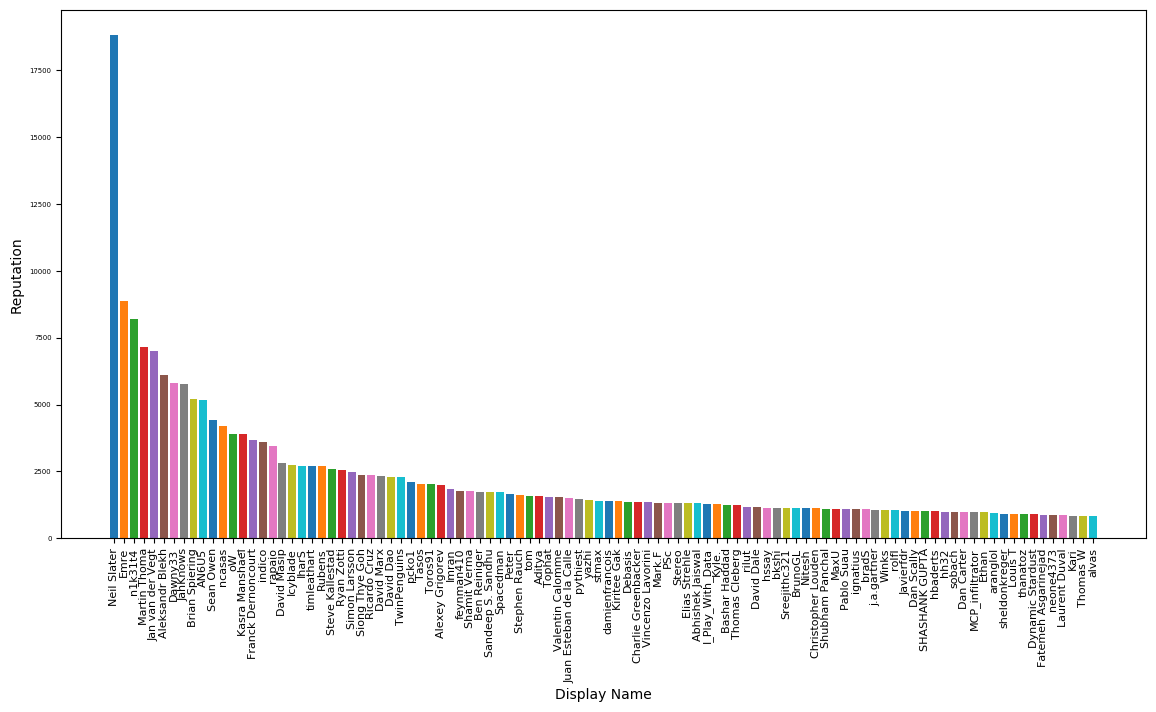

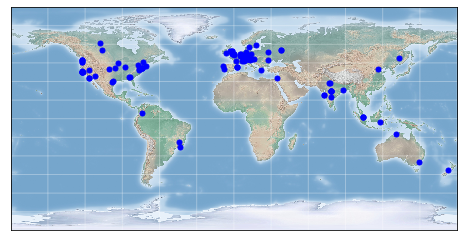

In [121]:
df_users.to_sql(name='users', con = con, if_exists='replace',index=False)
cursor.execute('select Location from users where (Location!="None" and Location not like("on the server farm%") and Location not like("Spacer world%") and Location not like("Series%") and Location not like("."))')
result = cursor.fetchall()

cursor.execute('select Reputation,DisplayName,Id,Location from users where (Location!="None" and Location not like("on the server farm%") and Location not like("Spacer world%") and Location not like("Series%") and Location not like("."))')
result1=cursor.fetchall()

result3 = []

count = 1
for i in result1:
        result2 = []
        rep = int(i[0])
        name = i[1]
        id = i[2]
        loc = i[3]
        result2.append(rep)
        result2.append(name)
        result2.append(id)
        result2.append(loc)
        result3.append(result2)
       
result3 = sorted(result3, key=operator.itemgetter(0), reverse=True)  # Reverse Sort

geolocator = Nominatim(user_agent='suseela',timeout=60)

latlong = []
x_list=[]
y_list=[]

for i in result3:
    if(count<101):
        x_list.append(i[0])
        y_list.append(i[1])
        count+=1
fig = plt.figure(dpi=100, figsize=(14, 7))
plt1.rc('xtick',labelsize=5)
plt1.rc('ytick',labelsize=5)
plt1.xticks(
    rotation=90, 
    fontweight='light',
    fontsize=8
    )
    
plt1.xlabel('Display Name',size = 10)
plt1.ylabel('Reputation',size = 10)

current_palette = sns.color_palette()
plt1.bar(y_list,x_list,color=current_palette)
plt1.show()

count1=0
for i in result3:   
    if(count1<101):
         latlonArr=[]  
         place=i[3].split(',')
         place1 = geolocator.geocode(place[0])
         latArr = np.array([0],np.float)
         lonArr = np.array([0],np.float)
         latArr[0] = float(place1.latitude)
         lonArr[0] = float(place1.longitude)
         latArr = latArr.round(decimals=5)
         lonArr = lonArr.round(decimals=5)
         latlonArr.append(latArr)
         latlonArr.append(lonArr)
         latlong.append(latlonArr)
         count1+=1   

plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

for i in latlong:
    latlongs2 = i
    lat = i[0]
    lon = i[1]
    x,y = m(lon,lat)
    plt.plot(x,y,'bo',markersize=5)

plt.show()

In [122]:
xtree = et.parse("C:/Users/souse/OneDrive/Desktop/501_Project/datascience.stackexchange.com/Posts.xml")
xroot = xtree.getroot()
columns = ["Title","Id","PostTypeId","ParentId","AcceptedAnswerId","Score","OwnerUserId","Year","ViewCount","AnswerCount","CommentCount","FavoriteCount","Tags"]
rows = []
for node in xroot: 
        s_title = node.attrib.get("Title")
        s_id = node.attrib.get("Id")
        s_ptypeid = node.attrib.get("PostTypeId")
        s_parentid = node.attrib.get("ParentId")
        s_acceptedId = node.attrib.get("AcceptedAnswerID")
        s_score = node.attrib.get("Score")
        s_ownerId = node.attrib.get("OwnerUserId")
        s_creationDate=node.attrib.get("CreationDate")
        s_year=s_creationDate[0:4]
        s_vcount = node.attrib.get("ViewCount")
        s_acount = node.attrib.get("AnswerCount")
        s_ccount = node.attrib.get("CommentCount")
        s_fcount = node.attrib.get("FavoriteCount")
        s_tags = node.attrib.get("Tags")
        rows.append({"Title":s_title,"Id":s_id,"PostTypeId":s_ptypeid,"ParentId":s_parentid,"AcceptedAnswerID":s_acceptedId,
                     "Score":s_score,"OwnerUserId":s_ownerId,"Year":s_year,"ViewCount":s_vcount,"AnswerCount":s_acount,"CommentCount":s_ccount,"FavoriteCount":s_fcount,"Tags":s_tags})
df_posts = pd.DataFrame(rows,columns = columns)   

In [13]:
Tried to implement heat maps, but need to process the data a lot so that correlation funciton does not receive string values

# df_posts.to_sql(name='posts', con = con, if_exists='replace',index=False)

# columns_hmap=["ViewCount", "AnswerCount", "CommentCount", "FavoriteCount"]
# f, ax = plt5.subplots(figsize=(8, 8))
# df_corr = df_posts[columns_hmap]
# df_corr.corr(method='kendall')
# print(df_corr)
# mask = df_corr.isnull()
# #sns.heatmap(df_corr, mask=mask)
# sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
# #sns.heatmap(df_corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)

NameError: name 'df_posts' is not defined

In [123]:
df_posts.to_sql(name='posts', con = con, if_exists='replace',index=False)
df_out1 = pd.read_sql('select count(p.Id) as PostCount,p.OwnerUserId,u.DisplayName,p.Year from posts p inner join users u on p.OwnerUserId = u.Id where (p.PostTypeId = 1 and p.OwnerUserId in (select u.Id from Users u where(u.Id in("836","381","45264","8820","14904","2452","11097","29587","1330","9420","21","14675","23305","8878","843","548","108","50727","28628","97")))) group by p.OwnerUserId, p.Year',con)
current_year = '2018'
dff_out1 = df_out1[df_out1['Year'].eq(current_year)].sort_values(by='PostCount', ascending=True)
df_out1.to_csv('questions.csv')

Text(1, 0.4, '2018')

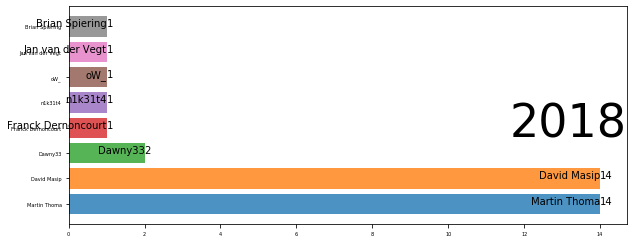

In [97]:
current_palette = sns.color_palette()
fig, ax = plt2.subplots(figsize=(10, 4))
dff_out1 = dff_out1[::-1]   

ax.barh(dff_out1['DisplayName'], dff_out1['PostCount'],alpha=0.8,color=current_palette)
for i, (Count, OwnerUserId) in enumerate(zip(dff_out1['PostCount'], dff_out1['DisplayName'])):
    ax.text(Count, i,     OwnerUserId,            ha='right')  
    ax.text(Count, i,     Count,           ha='left')   
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

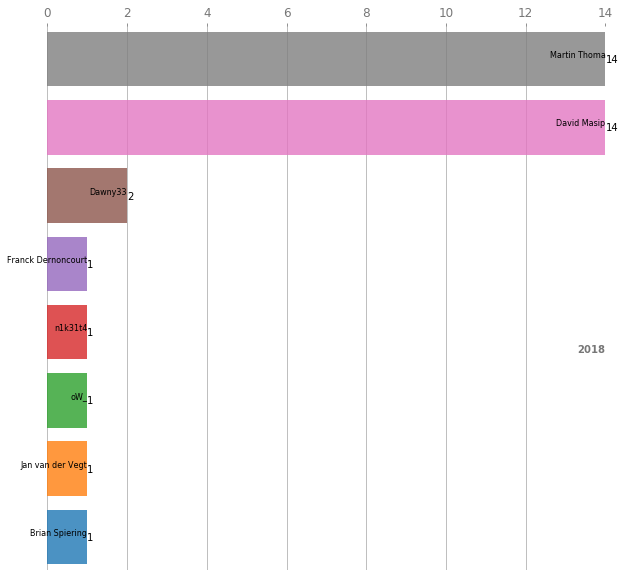

In [98]:
fig, ax = plt2.subplots(figsize=(10,10))

def draw_barchart(year):
    
    dff_out1 = df_out1[df_out1['Year'].eq(str(year))].sort_values(by='PostCount', ascending=True)
    ax.clear()
    ax.barh(dff_out1['DisplayName'], dff_out1['PostCount'],color=current_palette,alpha=0.8)
   
    for i, (value, name) in enumerate(zip(dff_out1['PostCount'], dff_out1['DisplayName'])):
        ax.text(value, i,     name,           size=8, weight=200, ha='right', va='bottom')
        ax.text(value, i,     f'{value:,.0f}',  size=10, ha='left',  va='center')
    
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=10, ha='right', weight=800)
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    plt.box(False)
    
draw_barchart('2018')

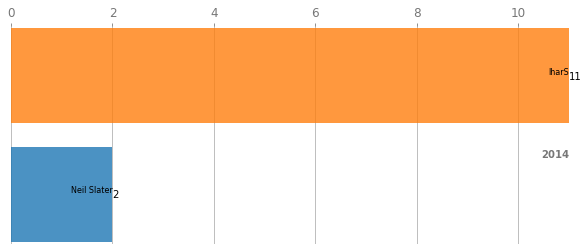

In [99]:
fig, ax = plt4.subplots(figsize=(10,4))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2014, 2020))
HTML(animator.to_jshtml())
animator.save("proj_rep_questionss.mp4",fps=1, dpi=80)

In [101]:
df_out3 = pd.read_sql('select count(p.Id) as PostCount,p.OwnerUserId,u.DisplayName,p.Year from posts p inner join users u on p.OwnerUserId = u.Id where (p.PostTypeId = 2 and p.OwnerUserId in (select u.Id from Users u where(u.Id in("836","381","45264","8820","14904","2452","11097","29587","1330","9420","21","14675","23305","8878","843","548","108","50727","28628","97")))) group by p.OwnerUserId, p.Year',con)
current_year = '2018'
dff_out3 = df_out3[df_out3['Year'].eq(current_year)].sort_values(by='PostCount', ascending=True)
df_out3.to_csv('answers.csv')

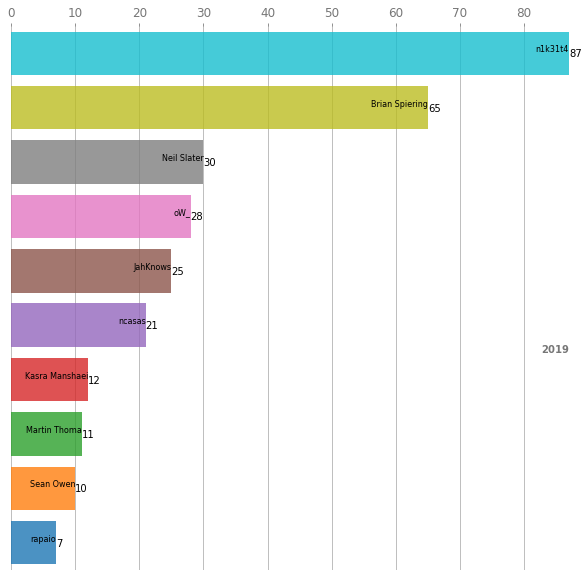

In [102]:
fig, ax = plt3.subplots(figsize=(10,10))

def draw_barchart1(year):
    
    dff_out3 = df_out3[df_out3['Year'].eq(str(year))].sort_values(by='PostCount', ascending=True)
    ax.clear()
    ax.barh(dff_out3['DisplayName'], dff_out3['PostCount'],color=current_palette,alpha=0.8)

    for i, (value, name) in enumerate(zip(dff_out3['PostCount'], dff_out3['DisplayName'])):
        ax.text(value, i,     name,           size=8, weight=100, ha='right', va='bottom')
        ax.text(value, i,     f'{value:,.0f}',  size=10, ha='left',  va='center')

    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=10, ha='right', weight=800)

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)

    plt.box(False)
    
draw_barchart1('2019')

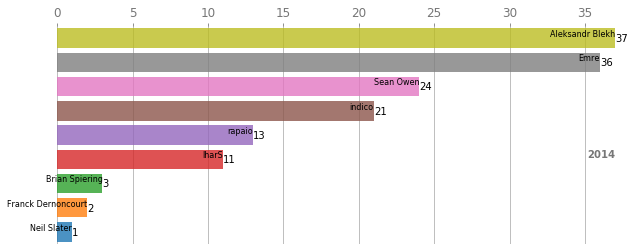

In [103]:
fig, ax = plt3.subplots(figsize=(10,4))
animator = animation.FuncAnimation(fig, draw_barchart1, frames=range(2014, 2020))
HTML(animator.to_jshtml())
animator.save("proj_rep_answers.mp4",fps=1, dpi=80)

In [104]:
xtree = et.parse("C:/Users/souse/OneDrive/Desktop/501_Project/datascience.stackexchange.com/Comments.xml")
xroot = xtree.getroot()
columns = ["Id","PostId","Score","Text","CreationDate","UserId","Year"]
rows = []

for node in xroot: 
    s_id = node.attrib.get("Id")
    s_pid = node.attrib.get("PostId")
    s_score = node.attrib.get("Score")
    s_text = node.attrib.get("Text")
    s_cdate = node.attrib.get("CreationDate")
    s_uid = node.attrib.get("UserId")
    s_year=s_cdate[0:4]	
    rows.append({"Id":s_id,"PostId":s_pid,"Score":s_score,"Text":s_text,"CreationDate":s_cdate,"UserId":s_uid,"Year":s_year})
df_comments = pd.DataFrame(rows,columns = columns)   
#print(df_comments)

In [105]:
df_comments.to_sql(name='comments', con = con, if_exists='replace',index=False)
df_out4  = pd.read_sql('select count(c.Id) as PostCount,c.UserId,u.DisplayName,c.Year from comments c inner join users u on c.UserId = u.Id where (c.UserId in (select u.Id from Users u where(u.Id in("836","381","45264","8820","14904","2452","11097","29587","1330","9420","21","14675","23305","8878","843","548","108","50727","28628","97")))) group by c.UserId, c.Year',con)
current_year = '2018'
dff_out4 = df_out4[df_out4['Year'].eq(current_year)].sort_values(by='PostCount', ascending=True)
df_out4.to_csv('comments.csv')

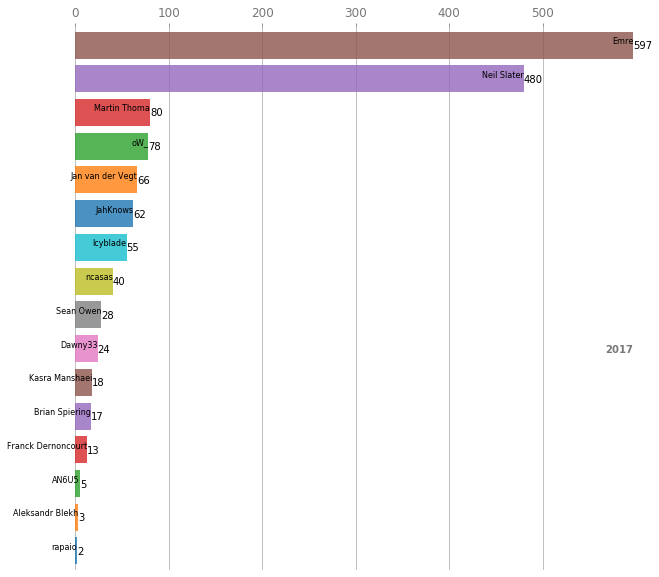

In [106]:
fig, ax = plt4.subplots(figsize=(10,10))

def draw_barchart2(year):
    
    dff_out4 = df_out4[df_out4['Year'].eq(str(year))].sort_values(by='PostCount', ascending=True)
    ax.clear()
    ax.barh(dff_out4['DisplayName'], dff_out4['PostCount'],color=current_palette,alpha=0.8)
   
    for i, (value, name) in enumerate(zip(dff_out4['PostCount'], dff_out4['DisplayName'])):
        ax.text(value, i,     name,           size=8, weight=200, ha='right', va='bottom')
        ax.text(value, i,     f'{value:,.0f}',  size=10, ha='left',  va='center')
    
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=10, ha='right', weight=800)
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    plt.box(False)
    
draw_barchart2('2017')

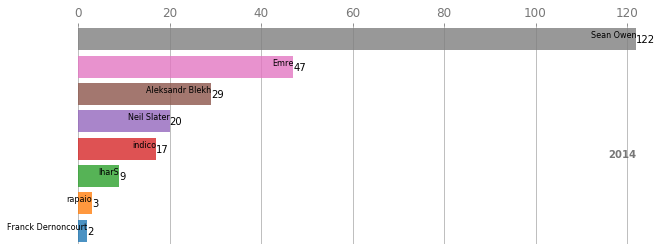

In [107]:
fig, ax = plt4.subplots(figsize=(10,4))
animator = animation.FuncAnimation(fig, draw_barchart2, frames=range(2014, 2020))
HTML(animator.to_jshtml())
animator.save("proj_rep_comments.mp4",fps=1, dpi=80)

In [163]:
xtree = et.parse("C:/Users/souse/OneDrive/Desktop/501_Project/datascience.stackexchange.com/Posts.xml")
xroot = xtree.getroot()
print(xroot)

def cleanxml(body):
       cleanThis = re.compile('<.*?>|&([a-z0-9]+);|\n|\?|,|[^\s\w]|ತ')
       cleanerText = re.sub(cleanThis, ' ', body)
       return cleanerText

columns = ["Body"]
rows = []

for node in xroot: 
    s_body = node.attrib.get("Body")
    s_body = cleanxml(s_body)
    rows.append({"Body":s_body})

    df_dsPosts = pd.DataFrame(rows,columns = columns)  
lowercase_words = []
for sentence in df_dsPosts['Body']: 
    word_list = str(sentence).split()
    lower = [word.lower() for word in word_list]
    lowercase_words.append((" ").join(lower))
df_dsPosts['Body'] = lowercase_words
total_words = []
for words in df_dsPosts['Body']:
    
    word_list = words.split()
    total_words.append(word_list)

<Element 'posts' at 0x00000218E5476278>


In [110]:
model1 = gensim.models.Word2Vec(total_words, min_count = 1,  
                              size = 100, window = 5) 

In [146]:
list_of_words=model1.wv.most_similar('data',topn=20)
print(list_of_words)

<class 'gensim.models.word2vec.Word2Vec'>
[('dataset', 0.6524703502655029), ('samples', 0.5866541862487793), ('datasets', 0.5746628046035767), ('set', 0.5573738217353821), ('outliers', 0.5407478213310242), ('test', 0.5322096943855286), ('testing', 0.5310689210891724), ('observations', 0.5291402339935303), ('information', 0.5145180821418762), ('features', 0.5113935470581055), ('instances', 0.5058087706565857), ('sets', 0.4990423023700714), ('process', 0.49512621760368347), ('sample', 0.4922146797180176), ('database', 0.4920780658721924), ('images', 0.4834100008010864), ('records', 0.47852838039398193), ('knowledge', 0.47528499364852905), ('population', 0.4713868796825409), ('variables', 0.47044438123703003)]


In [147]:
list_of_words=model1.wv.most_similar('good',topn=20)
print(list_of_words)

[('great', 0.756920337677002), ('bad', 0.7249177694320679), ('nice', 0.6910566091537476), ('reasonable', 0.6790101528167725), ('rough', 0.6480353474617004), ('perfect', 0.6399235725402832), ('decent', 0.6285388469696045), ('better', 0.6276842355728149), ('best', 0.6239660978317261), ('poor', 0.6221987009048462), ('useful', 0.5925078392028809), ('simple', 0.5739615559577942), ('reliable', 0.5730074644088745), ('fair', 0.571120023727417), ('solid', 0.5687075853347778), ('proper', 0.5674818158149719), ('strong', 0.5542032718658447), ('helpful', 0.5427208542823792), ('basic', 0.5376472473144531), ('straightforward', 0.5343627333641052)]


['great', 'bad', 'nice', 'reasonable', 'rough', 'perfect', 'decent', 'better', 'best', 'poor', 'useful', 'simple', 'reliable', 'fair', 'solid', 'proper', 'strong', 'helpful', 'basic', 'straightforward']
[0.756920337677002, 0.7249177694320679, 0.6910566091537476, 0.6790101528167725, 0.6480353474617004, 0.6399235725402832, 0.6285388469696045, 0.6276842355728149, 0.6239660978317261, 0.6221987009048462, 0.5925078392028809, 0.5739615559577942, 0.5730074644088745, 0.571120023727417, 0.5687075853347778, 0.5674818158149719, 0.5542032718658447, 0.5427208542823792, 0.5376472473144531, 0.5343627333641052]


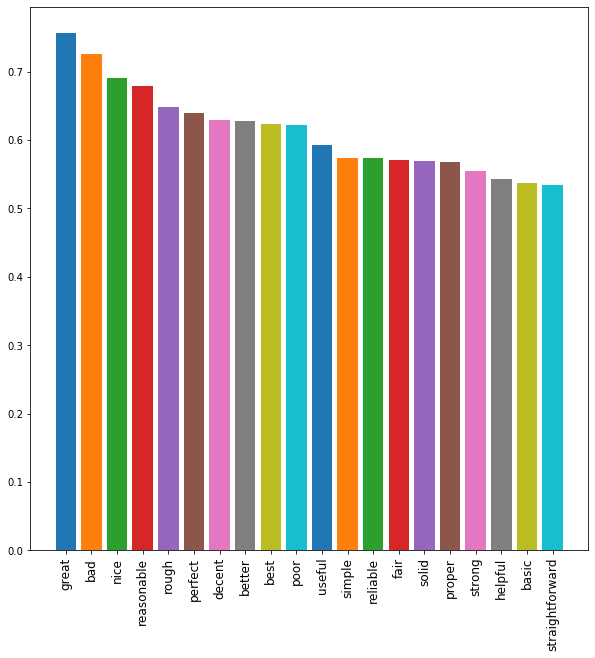

In [162]:
words_list=[]
scores_list=[]

for i in list_of_words:
    words_list.append(i[0])
    scores_list.append(i[1])
print(words_list)
print(scores_list)

plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(
    rotation='90',
    fontweight='light',
    fontsize=12 
    )
plt.bar(words_list,scores_list,color=current_palette)
plt.show()

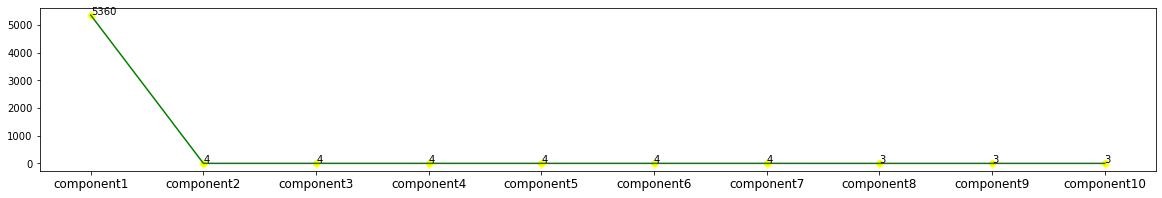

In [2]:
sizes = []
labels = 'component'
labels1 = []
listlens=[5360,4,4,4,4,4,4,3,3,3]
for i in range(10):
    sizes.append(listlens[i]) 
    labels = labels+str(i+1) 
    labels1.append(labels)
    labels = 'component'
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(
    fontweight='light',
    fontsize=12 
    )
plt.scatter(labels1,sizes,color='yellow')
plt.plot(labels1,sizes,color='green')
for i,j in zip(labels1,sizes):
    plt.text(i,j,str(j))

plt.show()

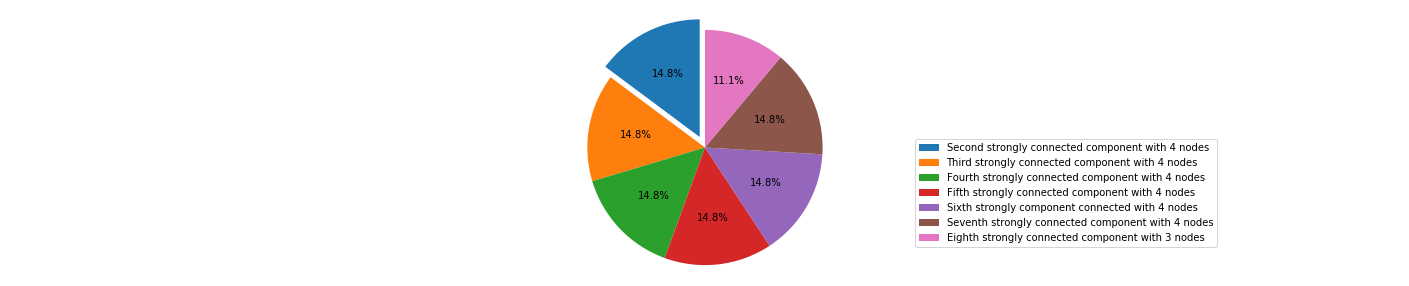

In [12]:
values = []
for x in range(7):                    
                lenx = listlens[x+1]
                values.append(lenx)
                
pielabels = ['Second strongly connected component with 4 nodes','Third strongly connected component with 4 nodes','Fourth strongly connected component with 4 nodes','Fifth strongly connected component with 4 nodes','Sixth strongly component connected with 4 nodes','Seventh strongly connected component with 4 nodes','Eighth strongly connected component with 3 nodes']
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0,0.0,0.0)
figureObject, axesObject = plt.subplots()
plt.rcParams["figure.figsize"] = (25,10)
axesObject.pie(values,explode=explodeTuple,autopct="%0.1f%%",startangle=90)
axesObject.legend(pielabels, bbox_to_anchor=(0.8,0.2), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
axesObject.axis('equal')
plt.show()    

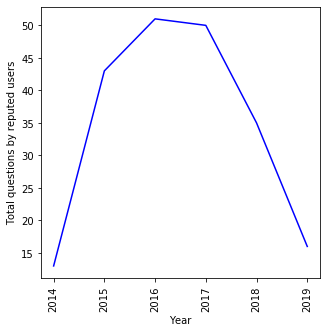

In [80]:
years = ['2014','2015','2016','2017','2018','2019']
counts = [13,43,51,50,35,16]

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(
    rotation=90, 
    fontweight='light',
    fontsize=10,
    )

plt1.xlabel('Year',size = 10)
plt1.ylabel('Total questions by reputed users',size = 10)

plt.plot(years,counts,color='blue') 
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

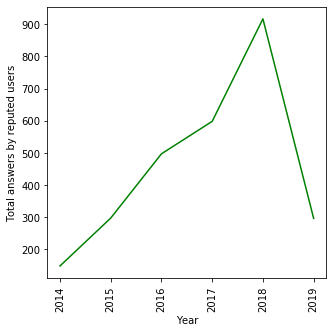

In [83]:
counts1 = [148,297,497,598,917,296]
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(
    rotation=90, 
    fontweight='light',
    fontsize=10,
    )

plt1.xlabel('Year',size = 10)
plt1.ylabel('Total answers by reputed users',size = 10)


plt.plot(years,counts1,color='green') 
plt.show()

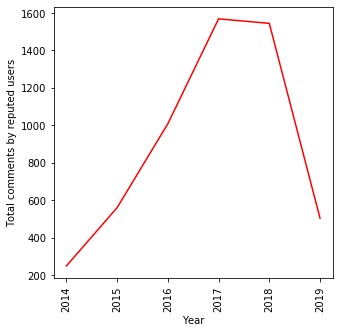

In [84]:
counts2 = [249,560,1008,1568,1544,504]
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(
    rotation=90, 
    fontweight='light',
    fontsize=10,
    )

plt1.xlabel('Year',size = 10)
plt1.ylabel('Total comments by reputed users',size = 10)

plt.plot(years,counts2,color='red') 
plt.show()